In [19]:
import os
import cv2
import matplotlib.pyplot as plt
import skimage as ski
import PIL as pil
from PIL import Image
import numpy as np


230410_screenshots_20190707004456_1.jpg
(1440, 2560, 3)


In [140]:
images = os.listdir('./test_data')

print(images[0])
img = Image.open('./test_data/'+images[0])
print(np.array(img).shape)

230410_screenshots_20190707004456_1.jpg
(1440, 2560, 3)


# Image tests

(1440, 2560, 3)


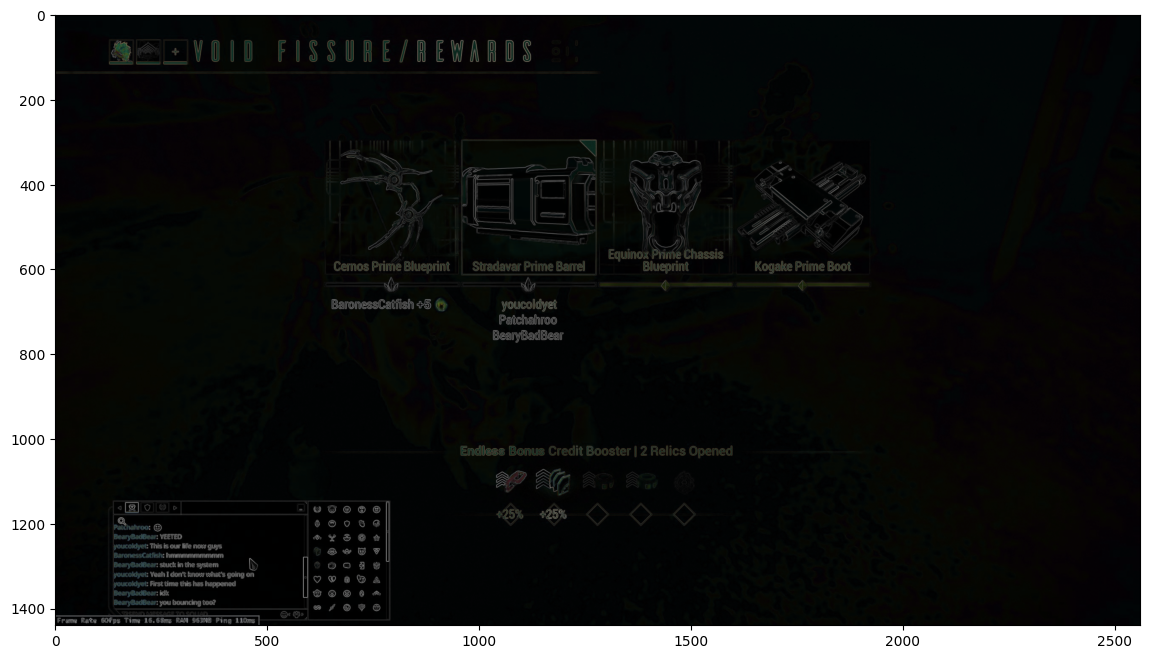

In [63]:
# display(img)
edges = ski.filters.sobel(np.array(img))
print(edges.shape)
fig = plt.figure(figsize=(14, 12))
plt.imshow(edges)

(-0.5, 2559.5, 1439.5, -0.5)

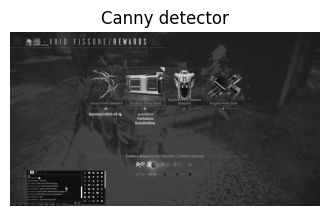

In [122]:
# convert to grayscale
gray_image = np.array(img).mean(axis=2)
fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(gray_image, cmap=plt.cm.gray)
ax.set_title('Canny detector')
ax.axis('off')

c:\Users\Keravnos\anaconda3\envs\relic-cracker-prime\lib\site-packages\skimage\_shared\utils.py:316: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


Text(0.5, 1.0, 'histogram of gray values')

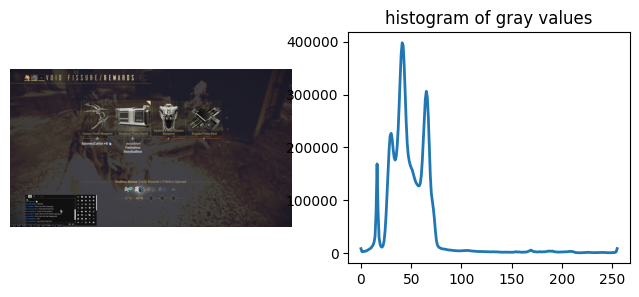

In [123]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import data
from skimage.exposure import histogram

hist, hist_centers = histogram(np.array(img))

fig, axes = plt.subplots(1, 2, figsize=(8, 3))
axes[0].imshow(np.array(img), cmap=plt.cm.gray)
axes[0].axis('off')
axes[1].plot(hist_centers, hist, lw=2)
axes[1].set_title('histogram of gray values')

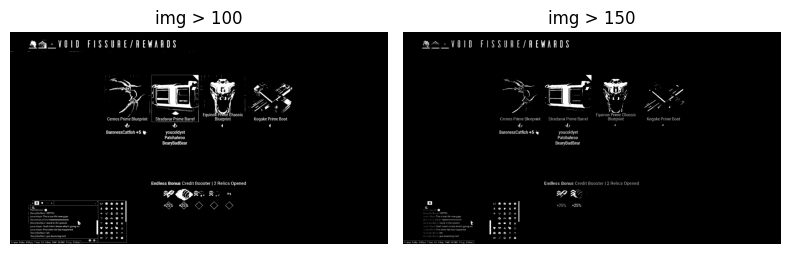

In [124]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3), sharey=True)

gray_image = np.array(img).mean(axis=2)
axes[0].imshow(gray_image > 100, cmap=plt.cm.gray)
axes[0].set_title('img > 100')

axes[1].imshow(gray_image > 150, cmap=plt.cm.gray)
axes[1].set_title('img > 150')

for a in axes:
    a.axis('off')

plt.tight_layout()

(-0.5, 2559.5, 1439.5, -0.5)

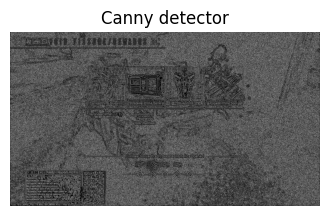

In [125]:
from skimage.feature import canny

# convert to grayscale
edges = canny(gray_image)

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(edges, cmap=plt.cm.gray)
ax.set_title('Canny detector')
ax.axis('off')

(-0.5, 2559.5, 1439.5, -0.5)

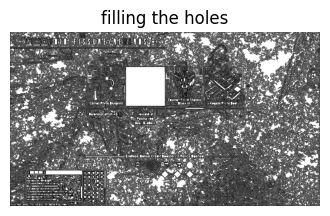

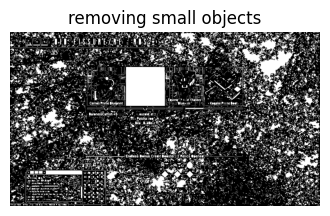

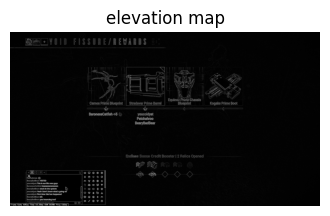

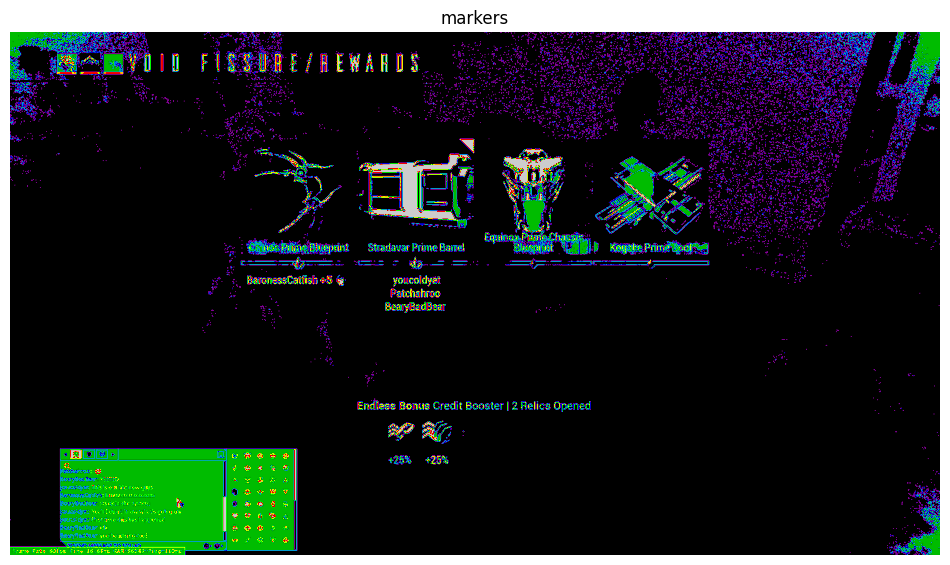

In [131]:
from scipy import ndimage as ndi

fill_coins = ndi.binary_fill_holes(edges)

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(fill_coins, cmap=plt.cm.gray)
ax.set_title('filling the holes')
ax.axis('off')

from skimage import morphology

coins_cleaned = morphology.remove_small_objects(fill_coins, 21)

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(coins_cleaned, cmap=plt.cm.gray)
ax.set_title('removing small objects')
ax.axis('off')

from skimage.filters import sobel

elevation_map = sobel(gray_image)

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(elevation_map, cmap=plt.cm.gray)
ax.set_title('elevation map')
ax.axis('off')

markers = np.zeros_like(gray_image)
markers[gray_image < 30] = 1
markers[gray_image > 150] = 2

fig, ax = plt.subplots(figsize=(12, 10))
ax.imshow(markers, cmap=plt.cm.nipy_spectral)
ax.set_title('markers')
ax.axis('off')

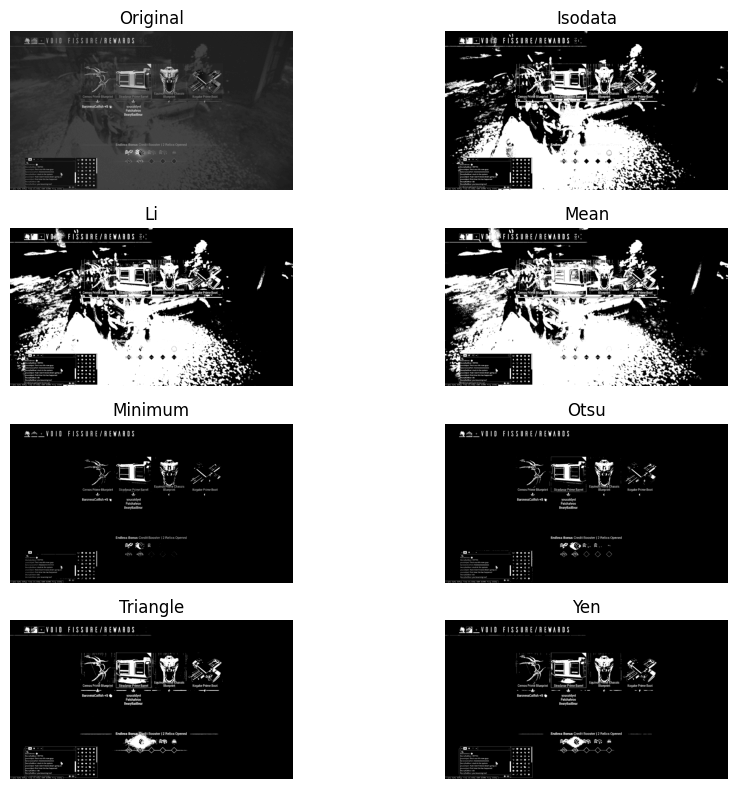

In [146]:
import matplotlib.pyplot as plt

from skimage import data
from skimage.filters import try_all_threshold

fig, ax = try_all_threshold(gray_image, figsize=(10, 8), verbose=False)
plt.show()